# The Spark Foundation - Graduate Rotational Internship Program (GRIP)

## Data Science & Business Analytics Tasks -1 (Prediction using Supervised ML)

## Task
Predict the percentage of an student based on the no. of study hours.

## Author: Priyadharshini D

## IMPORT LIBRARIES AND DATASETS

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [7]:
dataset_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(dataset_url)
print('Data Imported Successfully')

Data Imported Successfully


## EXPLORING DATASET

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## PLOTTING THE DISTRIBUTION OF SCORES

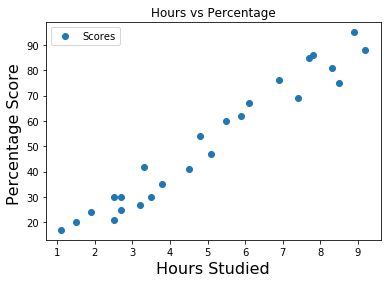

In [11]:
data.plot (x = 'Hours',y = 'Scores', style = 'o')
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied',fontsize=16)
plt.ylabel('Percentage Score ',fontsize=16)
plt.show()

## CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [67]:
#declaring independent and dependent variable¶
x = data['Hours']
y = data['Scores']

In [68]:
x.shape

(25,)

In [69]:
y.shape

(25,)

In [73]:
X1 = x.values.reshape(-1,1)
X1.shape

(25, 1)

In [74]:
regress = LinearRegression()

In [75]:
regress.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
regress.score(X1,y)

0.9529481969048356

In [77]:
regress.intercept_

2.483673405373196

In [78]:
regress.coef_

array([9.77580339])

In [79]:
new_df = pd.DataFrame(data=[2.5,9.5],columns=['Hours'])
new_df

,Hours
0,2.5
1,9.5


In [80]:
regress.predict(new_df)

array([26.92318188, 95.35380562])

In [81]:
new_df['Predicted_Percentage'] = regress.predict(new_df)
new_df

,Hours,Predicted_Percentage
0,2.5,26.923182
1,9.5,95.353806


In [91]:
X = data.iloc[:,:1]
Y = data.iloc[:,1]

In [94]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [95]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

## REGRESSION LINE

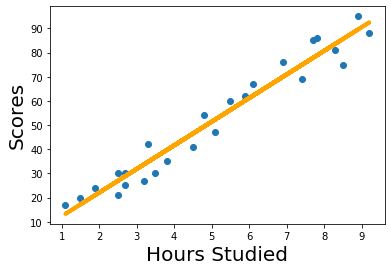

In [82]:
plt.scatter(x, y)
yhat = regress.coef_*X1+ regress.intercept_
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Hours Studied', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

## TRAINING THE MODEL

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2, random_state = 0)

In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,Y_train)
print('Training Sucessfull')

Training Sucessfull


In [98]:
model.intercept_

2.018160041434683

In [99]:
model.coef_

array([9.91065648])

## PLOTTING THE REGRESSION LINE

In [102]:
Regression_line = model.coef_*X+model.intercept_

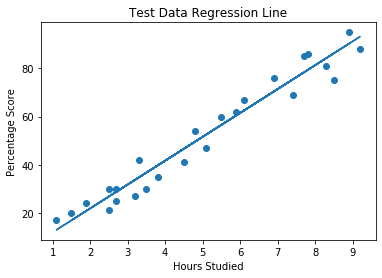

In [105]:
plt.scatter(X, Y)
plt.title('Test Data Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(X, Regression_line);
plt.show()

## PREDICTING THE SCORES

In [106]:
print(X_test) 
y_pred = model.predict(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


## PREDICTED Vs ACTUAL RESULT 

In [107]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  

In [108]:
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HOURS/DAY

In [111]:
hours_studied = 9.25
test = np.array([hours_studied])
test = test.reshape(-1,1)
own_pred = model.predict(test)

In [112]:
print("No of Hours = {}".format(hours_studied))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## EVALUATION 

In [113]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [114]:
print('Mean Squared Error:', 
      metrics.mean_squared_error(Y_test, y_pred)) 

Mean Squared Error: 21.5987693072174


In [115]:
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665


## CONCLUSION

Successfully completed the prediction using the supervised ML algorithm (Task 1). 

Thank you!